In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.ticker as ticker

In [67]:
def plotMaker(filename, cname, xaxis, xlim):
    ''' A function to make plots for carbon footprint of various kinds of food
        arguments:
            filename: the name of the data file (can be found in ../data in this repository)
            cname: the coulumn name of the x-axis values in the *.csv date files
            xaxis: x-axis label
            xlim: the upper limit for the x axis
    '''
    
    # Read the data
    df = pd.read_csv(filename).rename(columns={cname: 'value'})
    
    # list of all the items to be picked up from the dataframe and their
    # corresponding colors: red for animal based and green for plant based
    list = {'Beef (beef herd)': 'red', 
            'Beef (dairy herd)': 'red',
            'Cheese': 'red',
            'Eggs': 'red',
            'Fish (farmed)': 'red', 
            'Lamb & Mutton': 'red',
            'Pig Meat': 'red',
            'Poultry Meat': 'red',
            'Prawns (farmed)': 'red',
            'Milk': 'red', 
            'Groundnuts': 'green',
            'Maize': 'green',
            'Nuts': 'green',
            'Other Pulses': 'green',
            'Peas': 'green',
            # 'Soymilk': 'green',
            'Tofu (soybeans)': 'green',
            'Wheat & Rye': 'green'}
    
    # sort in ascending order
    df = df[df.Entity.isin(list.keys())].sort_values('value', ascending=True)

    # The list of colors for the bars
    color = ["#5c0029","#61304b","#857c8d","#94bfbe","#acf7c1","#89d2dc","#aad2ba","#d9fff5","#b9f5d8","#cacaaa", 
             "#006ba6","#0496ff","#ffbc42","#d81159","#8f2d56","#fecee9","#eb9fef","#b56576","#e56b6f","#34d1bf"]

    # The actual plotting of the bar plot
    plt.figure(figsize=(10,6))
    plt.barh(df.Entity, df.value, color=color, zorder=49)
    
    # Annotations at the end of the bar
    for y, x in enumerate(df['value']):
        plt.annotate('{:3.2f}'.format(x)+' kg', xy=(x+1, y), va='center', fontsize=14, color='#272C34')

    # various formatting
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=14, bottom=False, left=False, color='#272C34')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_zorder(99)
    ax.spines['left'].set_color('#474747')
    ax.spines['left'].set_alpha(0.5)

    # Add kg to the xaxis tick labels
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%3.0f'+' kg'))
    
    # color the y-labels according to animal or plant based
    labelcolor = [list[key] for key in list.keys()]
    for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), reversed(labelcolor)):
        ticklabel.set_color(tickcolor)

    # some more formatting and final output
    plt.xlabel(xaxis, fontsize=16, color='#272C34')
    plt.xlim(0,xlim)
    plt.ylim(-0.4,len(list)-0.6)
    plt.grid(linestyle='dashed', axis='x', alpha=0.3, color='#272C34')
    plt.tight_layout()
    plt.savefig('../plots/'+filename[8:-4]+'.pdf', dpi=300)
    plt.show()

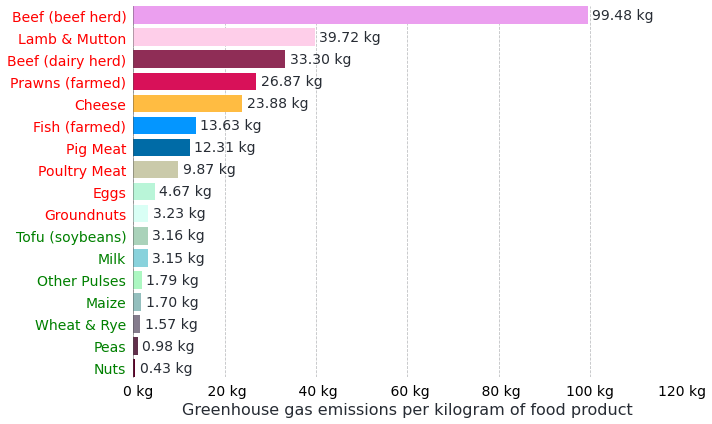

In [68]:
filename = '../data/Figure1_per_kg.csv'
cname = 'GHG emissions per kilogram (Poore & Nemecek, 2018)'
xaxis = 'Greenhouse gas emissions per kilogram of food product'

plotMaker(filename, cname, xaxis, xlim=120)

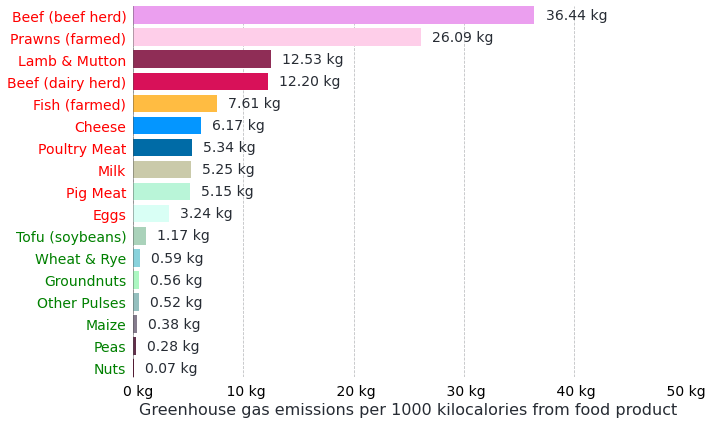

In [69]:
filename = '../data/Figure1_per_1000_kcal.csv'
cname = 'GHG emissions per 1000kcal (Poore & Nemecek, 2018)'
xaxis = 'Greenhouse gas emissions per 1000 kilocalories from food product'

plotMaker(filename, cname, xaxis, xlim=50)

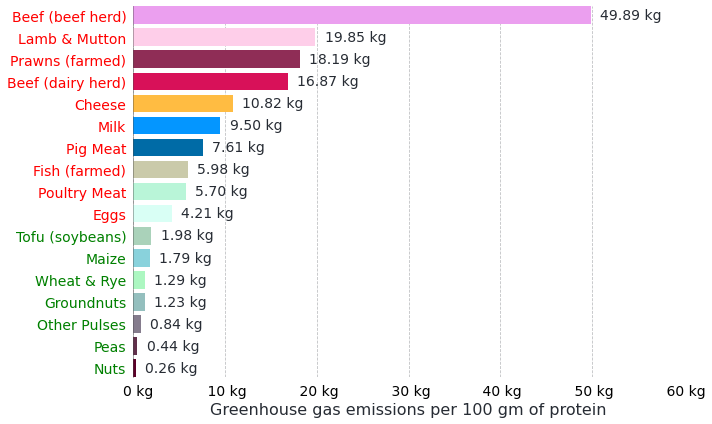

In [70]:
filename = '../data/Figure1_per_100g_protein.csv'
cname = 'GHG emissions per 100g protein (Poore & Nemecek, 2018)'
xaxis = 'Greenhouse gas emissions per 100 gm of protein'

plotMaker(filename, cname, xaxis, xlim=60)